<a href="https://colab.research.google.com/github/The237/DeepLearningCourses/blob/main/01_07_Sigmoid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def sigmoid(x):
  return 1/(1 + np.exp(-x))

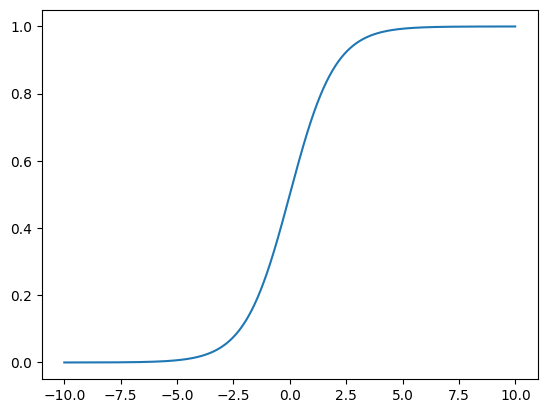

In [4]:
X = np.arange(-10, 10, .01)
plt.plot(X, sigmoid(X))
plt.show()

In [5]:
sigmoid(0)

0.5

In [6]:
ds_dx = sigmoid(X) * (1 - sigmoid(X))

# Model avec Sigmoid

In [19]:
# define a loss function based on mean squared
def erreur(X, Y, params):
  info = {}
  M1 = np.dot(X,params["W1"])

  N1 = M1 + params["B1"]

  S1 = sigmoid(N1)

  M2 = np.dot(S1, params["W2"])

  P = M2 + params["B2"]

  L = np.mean((Y-P)**2)

  info["M1"] = M1
  info["N1"] = N1
  info["S1"] = S1
  info["M2"] = M2
  info["P"] = P

  info["X"] = X
  info["Y"] = Y

  return L, info

In [23]:
def gradient(info, params):
  grads = {}

  dL_dP = -2*(info["Y"] - info["P"]) # shape (4,1)

  dP_dM2 = 1
  dL_dM2 = dL_dP * dP_dM2

  dP_dB2 = 1
  dL_dB2 = dL_dP * dP_dB2
  dL_dB2 = dL_dB2.sum()

  dM2_dW2 = info["S1"].T
  dL_dW2 = np.dot(dM2_dW2, dL_dP)

  dM2_dS1 = params["W2"].T
  dL_dS1 = np.dot(dL_dM2, dM2_dS1)

  dS1_dN1 = sigmoid(info["N1"]) * (1 - sigmoid(info["N1"]))
  dL_dN1 = dL_dS1 * dS1_dN1

  dN1_dB1 = 1
  dN1_dM1 = 1

  dL_dB1 = (dL_dN1 * dN1_dB1).sum()
  dL_dB1 = dL_dB1.sum()
  dL_dM1 = dL_dN1 * dN1_dM1

  dM1_dW1 = info["X"].T
  dL_dW1 = np.dot(dM1_dW1, dL_dM1)

  grads["W1"] = dL_dW1
  grads["W2"] = dL_dW2
  grads["B1"] = np.sum(dL_dB1)
  grads["B2"] = np.sum(dL_dB2)

  return grads

In [21]:
def train(X, Y, epoch, lr):
  np.random.seed(42)
  n_features = X.shape[1]
  n_feat_transform = n_features
  params = {}
  params["W1"] = np.random.randn(n_features, n_feat_transform)
  params["B1"] = np.random.randn(1, n_feat_transform)
  params["W2"] = np.random.randn(n_feat_transform, 1)
  params["B2"] = np.random.randn(1, 1)

  errors = []
  for i in range(epoch):

    # forward
    loss , info = erreur(X,Y, params)
    errors.append(loss)
    print(f'Epoch {i+1} ............. loss : {loss}')

    # backward
    grads = gradient(info, params)

    # update
    for p in params:
      params[p] -= lr*grads[p]

  return params, errors

# Application au BOSTON Dataset

In [13]:

import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header = None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
data = data
target = target

X = data
y = target.reshape((len(X), 1))

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 0)

In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
params, errors = train(X_train, y_train, epoch = 100, lr = .0001)

Epoch 1 ............. loss : 658.747187918459
Epoch 2 ............. loss : 364.03824881583705
Epoch 3 ............. loss : 204.36163978775102
Epoch 4 ............. loss : 107.81590012640753
Epoch 5 ............. loss : 79.82851947423356
Epoch 6 ............. loss : 69.1923806790014
Epoch 7 ............. loss : 61.51000932784534
Epoch 8 ............. loss : 55.87126460945957
Epoch 9 ............. loss : 51.6108991888034
Epoch 10 ............. loss : 48.18702007396802
Epoch 11 ............. loss : 45.279434222606184
Epoch 12 ............. loss : 42.7098470294775
Epoch 13 ............. loss : 40.38472696704206
Epoch 14 ............. loss : 38.25904125179606
Epoch 15 ............. loss : 36.312561000344154
Epoch 16 ............. loss : 34.53576444191028
Epoch 17 ............. loss : 32.92242489198569
Epoch 18 ............. loss : 31.46630112837073
Epoch 19 ............. loss : 30.159695404962292
Epoch 20 ............. loss : 28.99257512141943
Epoch 21 ............. loss : 27.95233444318296

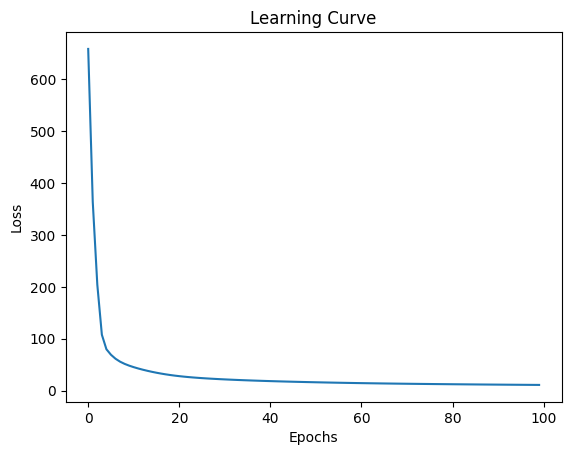

In [35]:
import matplotlib.pyplot as plt


plt.plot(list(range(len(errors))), errors)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Learning Curve")
plt.show()


In [29]:
def predict(X, params):
  M1 = np.dot(X, params["W1"])

  N1 =  M1 + params['B1']

  S1 = sigmoid(N1)

  M2 = np.dot(S1, params["W2"])

  P = M2 + params["B2"]

  return P

# mean squared error and root mean squared error
def mse(y, pred):
  return np.mean((y - pred)**2)

def rmse(y, pred):
  return np.sqrt(np.mean((y - pred)**2))

def mae(y, pred):
  return np.mean(np.abs(y-pred))

In [30]:
params

{'W1': array([[ 0.19665802, -0.62385032, -0.2247193 ,  1.42494786, -0.56077595,
         -0.61266909,  0.93585596,  0.38947018, -1.07258029, -0.07404061,
         -1.06763789, -0.6548138 ,  0.03631851],
        [-1.52797301, -0.88217803, -0.18905627, -1.02044456,  0.34621046,
         -0.73835804, -1.12366035,  1.49390571,  0.35885596,  0.62599868,
         -1.06629811, -0.15030655,  0.34696824],
        [-0.95265724,  0.13858929, -0.51954418, -0.18900113, -0.09175982,
          1.79186067,  0.06459457, -0.65960914,  0.79348708, -1.46114839,
          0.30700148, -2.10259124, -1.01750881],
        [ 0.28683646,  0.81121235,  0.07000255, -0.07821532,  0.32302434,
         -0.93914289, -0.80109512,  0.07137668,  1.01480478,  1.07963598,
         -1.35926589,  0.58785   , -0.10124171],
        [-0.72171899,  0.20726282,  0.67146361,  1.03717552, -0.99325652,
         -0.48112488,  0.22679309,  0.97800288, -0.72104295, -0.43517563,
         -1.50273505, -1.30240257,  1.02158879],
        [

In [37]:
predictions = predict(X_test, params)
score_rmse = rmse(y_test, predictions)
score_mae = mae(y_test, predictions)

print(f'RMSE : : {score_rmse} and MAE : {score_mae}')

RMSE : : 4.788564353798276 and MAE : 3.144644776021807
